<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [3]:
data=pd.read_csv("/content/drive/MyDrive/data/online_shoppers_intention.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.shape


(12330, 18)

In [7]:
data.describe

<bound method NDFrame.describe of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0        

In [8]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
            "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"]
X = data[features].values

In [10]:
# Select features for clustering
X = data[features]


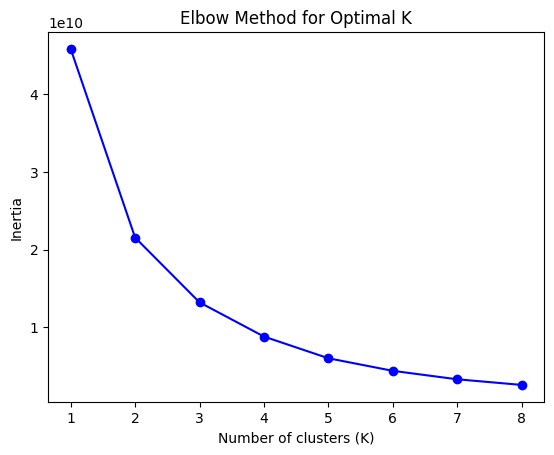

In [11]:
# Elbow Method
inertia_values = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 9), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Coefficient: 0.6950392412955805


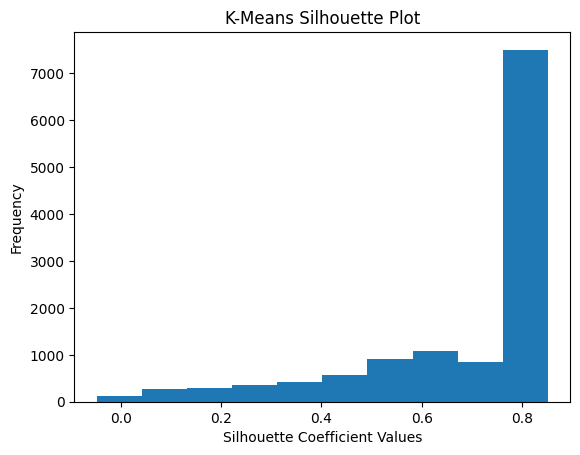

In [12]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your data
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. Evaluate K-Means Cluster Quality
silhouette_avg = silhouette_score(X, y_kmeans)
print("K-Means Silhouette Coefficient:", silhouette_avg)

# Visualize individual silhouette scores
sample_silhouette_values = silhouette_samples(X, y_kmeans)
plt.hist(sample_silhouette_values)
plt.title("K-Means Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Frequency")
plt.show()



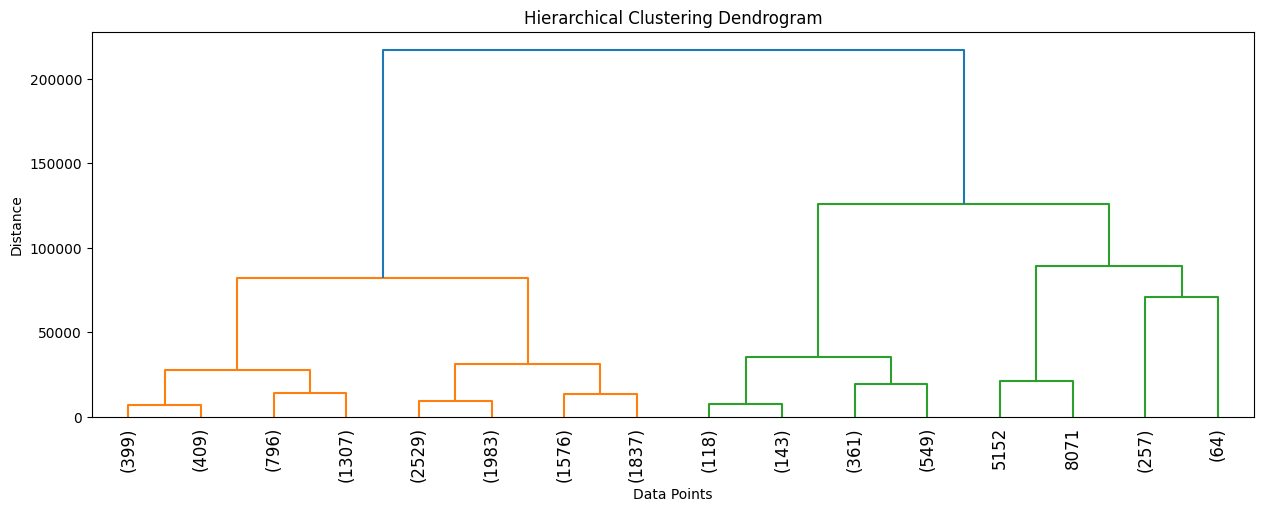

Hierarchical Clustering Silhouette Coefficient: 0.6905004711484506


In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
optimal_clusters_hc = 3
linkage_matrix = linkage(X, method="ward")

# Plotting the Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, leaf_rotation=90, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Determine appropriate number of clusters from dendrogram (e.g., 3)
hc = AgglomerativeClustering(n_clusters=optimal_clusters_hc, linkage="ward")
y_hc = hc.fit_predict(X)

# 5. Evaluate Hierarchical Cluster Quality
silhouette_avg_hc = silhouette_score(X, y_hc)
print("Hierarchical Clustering Silhouette Coefficient:", silhouette_avg_hc)



In [18]:
from sklearn.preprocessing import LabelEncoder

print("Columns in X:", X.columns)

label_encoder = LabelEncoder()


Columns in X: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')


In [19]:

# Standardize all columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


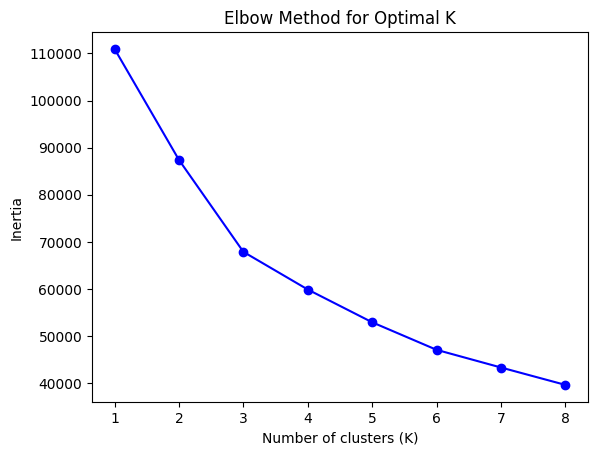

In [20]:
# Elbow Method
inertia_values = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 9), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [21]:
optimal_clusters = 3  # Replace with the optimal number from the elbow method

kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)


In [22]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.49425753882735995


In [23]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")


Inertia: 67872.60378041476


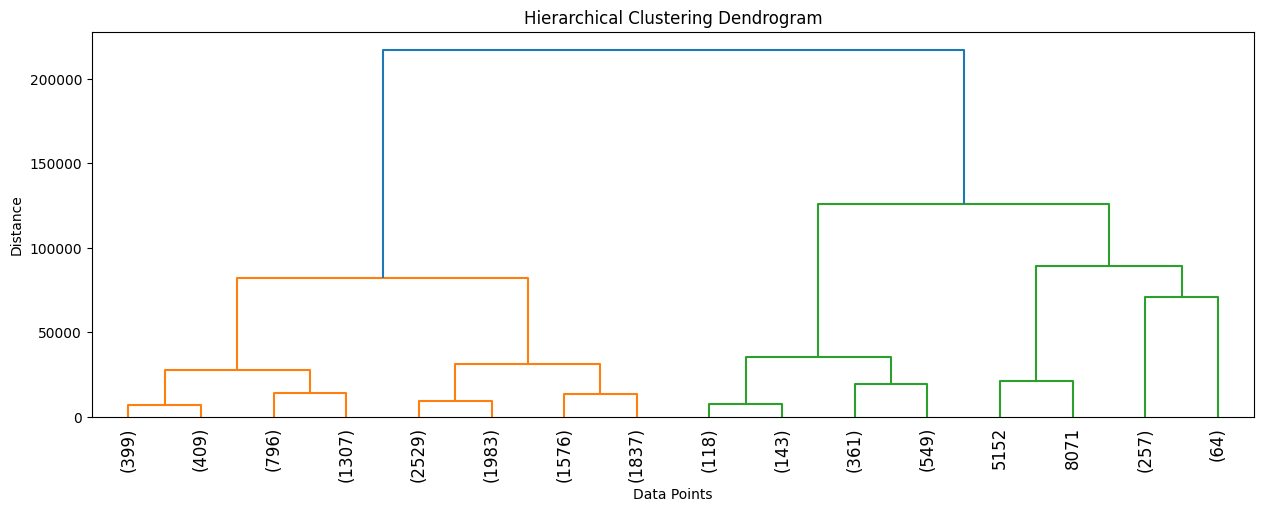

Hierarchical Clustering Silhouette Coefficient: 0.5015501311523806


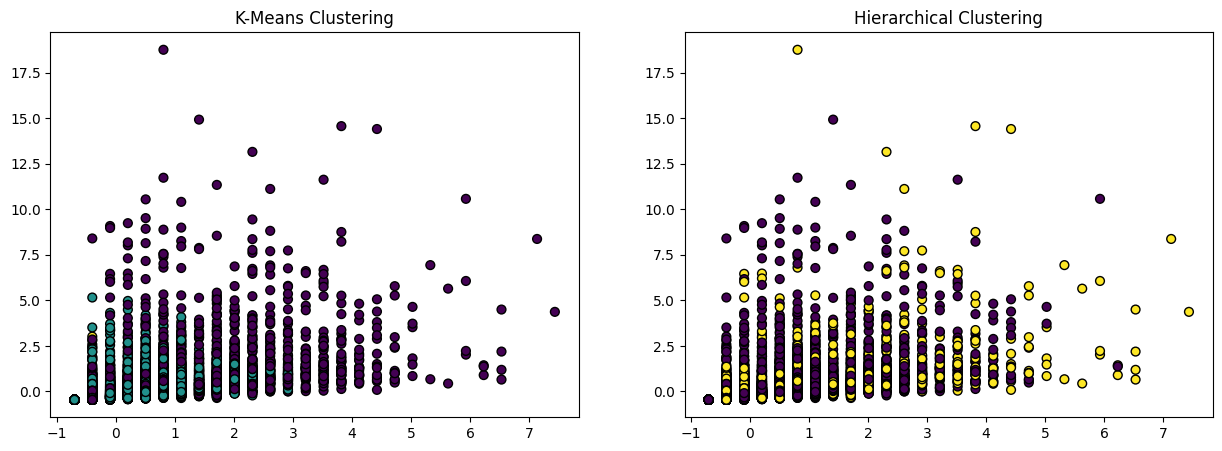

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
optimal_clusters_hc = 3
linkage_matrix = linkage(X, method="ward")

# Plotting the Dendrogram
plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, leaf_rotation=90, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Determine appropriate number of clusters from dendrogram (e.g., 3)
hc = AgglomerativeClustering(n_clusters=optimal_clusters_hc, linkage="ward")
y_hc = hc.fit_predict(X_scaled)

# 5. Evaluate Hierarchical Cluster Quality
silhouette_avg_hc = silhouette_score(X_scaled, y_hc)
print("Hierarchical Clustering Silhouette Coefficient:", silhouette_avg_hc)

# 6. Visualization for Comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=40)
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc, cmap='viridis', edgecolor='k', s=40)
plt.title('Hierarchical Clustering')

plt.show()